In [53]:
import numpy as np
import pandas as pd
import torch as T
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

In [2]:
#import dataset
ds = pd.read_csv('2500_randomly_choosen_days_with_data.csv')

In [3]:
ds.describe()

,Unnamed: 0,avg_temp,co2,sea_ice_extent,num_natural_disasters
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,1102.000000,9.093069,370.581837,11.610827,452.292517
std,636.672993,4.130893,18.282012,5.584291,231.389085
min,0.000000,2.558000,333.400000,2.281000,21.000000
25%,551.000000,4.724000,355.430000,6.089000,257.000000
50%,1102.000000,9.313000,369.940000,12.339000,465.000000
75%,1653.000000,12.930000,386.280000,17.167000,624.000000
max,2204.000000,15.482000,404.510000,19.978000,911.000000


In [4]:
#split into independent and dependent variables
X = ds[['avg_temp', 'co2', 'num_natural_disasters']]
Y = ds[['sea_ice_extent']]

In [5]:
#split training and testing as 75%-25%
X_trn = X.iloc[:1653, :].to_numpy()
X_tst = X.iloc[1653:, :].to_numpy()
Y_trn = Y.iloc[:1653, :].to_numpy()
Y_tst = Y.iloc[1653:, :].to_numpy()

In [22]:
#Define linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dims, output_dims, fc_dims=[]):
        super(LinearRegressionModel, self).__init__()
        self.input_dims = input_dims
        self.output_dims = output_dims
        self.fc_dims = fc_dims
        self.nn_layers = nn.ModuleList()

        self.makeLayer()
        
        self.criterion = nn.MSELoss(size_average = False)
        self.optimizer = optim.Adam(self.parameters(), lr=0.01)
        
    def makeLayer(self):
        if len(self.fc_dims) == 0:
                self.nn_layers.append(nn.Linear(self.input_dims, self.output_dims))
                return 
        
        self.nn_layers.append(nn.Linear(self.input_dims, self.fc_dims[0]))
        for i in range(len(self.fc_dims)-1):
            self.nn_layers.append(nn.Linear(self.fc_dims[i], self.fc_dims[i+1]))
        self.nn_layers.append(nn.Linear(self.fc_dims[-1], self.output_dims))
        
    def forward(self, data):
        x = data
        for layer in self.nn_layers:
            x = layer(x)
        return x

In [32]:
#Define regression model
class RegressionModel(nn.Module):
    def __init__(self, input_dims, output_dims, fc_dims=[]):
        super(RegressionModel, self).__init__()
        self.input_dims = input_dims
        self.output_dims = output_dims
        self.fc_dims = fc_dims
        self.nn_layers = nn.ModuleList()

        self.makeLayer()
        
        self.criterion = nn.MSELoss(size_average = False)
        self.optimizer = optim.Adam(self.parameters(), lr=0.01)
        
    def makeLayer(self):
        if len(self.fc_dims) == 0:
                self.nn_layers.append(nn.Linear(self.input_dims, self.output_dims))
                return 
        
        self.nn_layers.append(nn.Linear(self.input_dims, self.fc_dims[0]))
        for i in range(len(self.fc_dims)-1):
            self.nn_layers.append(nn.Linear(self.fc_dims[i], self.fc_dims[i+1]))
        self.nn_layers.append(nn.Linear(self.fc_dims[-1], self.output_dims))
        
    def forward(self, data):
        x = data
        for layer in self.nn_layers:
            x = layer(x)
        x = F.sigmoid(x)
        return x

/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Neurons in hidden layer:  1
Mean Squared Error:
	Training: 20.60478080623454
	Testing: 18.426853639977548
R2 Score:
	Training: 0.3438360005443518
	Testing: 0.3940950124492404
Mean Absolute Percentage Error:
	Training: 0.47333193398720835
	Testing: 0.4146922009863085



Neurons in hidden layer:  2
Mean Squared Error:
	Training: 20.649356386911563
	Testing: 18.027415783006013
R2 Score:
	Training: 0.34241648089159993
	Testing: 0.4072291803589788
Mean Absolute Percentage Error:
	Training: 0.4718058692713546
	Testing: 0.42201691017535164



Neurons in hidden layer:  3
Mean Squared Error:
	Training: 21.561962631127294
	Testing: 17.802469647698537
R2 Score:
	Training: 0.31335432445499256
	Testing: 0.41462577600010175
Mean Absolute Percentage Error:
	Training: 0.4879937298696834
	Testing: 0.4381255210103522



Neurons in hidden layer:  4
Mean Squared Error:
	Training: 21.257017273279544
	Testing: 17.807951700703466
R2 Score:
	Training: 0.323065379743689
	Testing: 0.4144455171603345
Mean Absolu

Neurons in hidden layer:  32
Mean Squared Error:
	Training: 23.128476458894497
	Testing: 21.08323603095535
R2 Score:
	Training: 0.2634683301269536
	Testing: 0.3067488289399962
Mean Absolute Percentage Error:
	Training: 0.49324606868271037
	Testing: 0.6310659334753521



Neurons in hidden layer:  33
Mean Squared Error:
	Training: 26.212203692772167
	Testing: 21.01289516804581
R2 Score:
	Training: 0.16526632477491265
	Testing: 0.3090617511837075
Mean Absolute Percentage Error:
	Training: 0.5145978892260425
	Testing: 0.6117950319922891



Neurons in hidden layer:  34
Mean Squared Error:
	Training: 26.714323886635125
	Testing: 45.77488470288736
R2 Score:
	Training: 0.14927619133399417
	Testing: -0.5051528322701877
Mean Absolute Percentage Error:
	Training: 0.5243764796574697
	Testing: 0.9522764117527042



Neurons in hidden layer:  35
Mean Squared Error:
	Training: 39.31213546002397
	Testing: 17.77927473081412
R2 Score:
	Training: -0.25190402524381583
	Testing: 0.41538846268013285
Mean Abs

Neurons in hidden layer:  63
Mean Squared Error:
	Training: 28.563585401808062
	Testing: 44.558304455198936
R2 Score:
	Training: 0.09038603165473513
	Testing: -0.46514969042990484
Mean Absolute Percentage Error:
	Training: 0.529327074034877
	Testing: 0.9405342216460861



Neurons in hidden layer:  64
Mean Squared Error:
	Training: 23.950779284038646
	Testing: 39.31684765749497
R2 Score:
	Training: 0.2372819069087555
	Testing: -0.2928020461814784
Mean Absolute Percentage Error:
	Training: 0.5000760760070974
	Testing: 0.8251400441314156



Neurons in hidden layer:  65
Mean Squared Error:
	Training: 28.645942974859693
	Testing: 36.6847538496667
R2 Score:
	Training: 0.0877633357363845
	Testing: -0.20625451088198155
Mean Absolute Percentage Error:
	Training: 0.5300499092259944
	Testing: 0.8336649930931394



Neurons in hidden layer:  66
Mean Squared Error:
	Training: 21.9709465974038
	Testing: 17.507712631764917
R2 Score:
	Training: 0.30033013567332767
	Testing: 0.42431786720346876
Mean Abs

Neurons in hidden layer:  94
Mean Squared Error:
	Training: 137.49235463381783
	Testing: 19.393121114575564
R2 Score:
	Training: -3.378475760528471
	Testing: 0.3623225626536426
Mean Absolute Percentage Error:
	Training: 0.7282934342764856
	Testing: 0.40642892970848943



Neurons in hidden layer:  95
Mean Squared Error:
	Training: 24.993915134532028
	Testing: 37.976323369979355
R2 Score:
	Training: 0.2040630050397192
	Testing: -0.24872342225533628
Mean Absolute Percentage Error:
	Training: 0.5076847940939554
	Testing: 0.8696648927060645



Neurons in hidden layer:  96
Mean Squared Error:
	Training: 42.50047943393096
	Testing: 21.163755444571912
R2 Score:
	Training: -0.35343757482305294
	Testing: 0.30410121935573753
Mean Absolute Percentage Error:
	Training: 0.6109965281643408
	Testing: 0.6106624809013405



Neurons in hidden layer:  97
Mean Squared Error:
	Training: 73.2484431554096
	Testing: 20.166467718989587
R2 Score:
	Training: -1.332613574817088
	Testing: 0.3368936655736052
Mean Ab

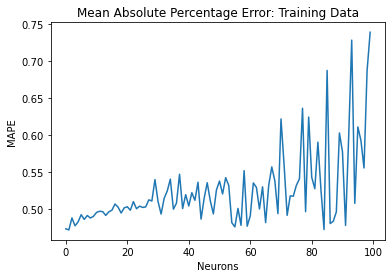

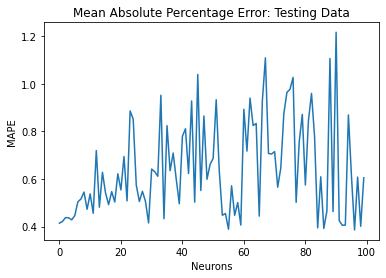

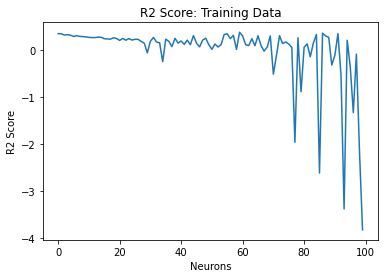

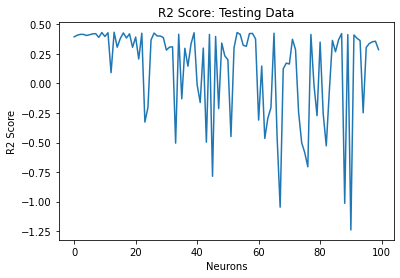

Maximum Values and Neuron Count:
	Mean Absolute Percentage Error Training Data:  0.7389304541538515
	Neuron Count:  99
	Mean Absolute Percentage Error Testing Data:  1.2172845284576408
	Neuron Count:  90
	R2 Score Training Data:  0.008703570435031782
	Neuron Count:  58
	R2 Score Testing Data:  0.012004217280576102
	Neuron Count:  78


In [71]:
# Create 100 different models with a different neuron 
# count in the only hidden layer

# Create Models
MODEL_COUNT = 100

models = []
for i in range(MODEL_COUNT):
    models.append(LinearRegressionModel(3, 1, [i+1]))

#training for linear regression
EPOCHS = 10

mape_trn = []
mape_tst = []
r2_trn = []
r2_tst = []
for i in range(len(models)):
    model = models[i]
    neuron_count = i+1
    for epoch in range(EPOCHS):
        y_pred_e = []
        for i in range(len(X_trn)):
            x = T.from_numpy(X_trn[i]).float()
            y = T.from_numpy(Y_trn[i]).float()

            pred_y = model(x)
            y_pred_e.append(pred_y.item())

            loss = model.criterion(pred_y, y)

            model.optimizer.zero_grad()
            loss.backward()
            model.optimizer.step()
            #print('epoch {}, loss {}'.format(epoch, loss.item()))
        y_pred_trn = y_pred_e

    #testing for linear regression
    y_pred_tst = []
    for x in X_tst:
        pred = model(T.from_numpy(x).float()).item()
        y_pred_tst.append(pred)
    
    print("Neurons in hidden layer: ", neuron_count)
    print("Mean Squared Error:")
    print("\tTraining:", mean_squared_error(Y_trn, y_pred_trn))
    print("\tTesting:", mean_squared_error(Y_tst, y_pred_tst))

    print("R2 Score:")
    print("\tTraining:", r2_score(Y_trn, y_pred_trn))
    r2_trn.append(r2_score(Y_trn, y_pred_trn))
    print("\tTesting:", r2_score(Y_tst, y_pred_tst))
    r2_tst.append(r2_score(Y_tst, y_pred_tst))
    
    print("Mean Absolute Percentage Error:")
    print("\tTraining:", mean_absolute_percentage_error(Y_trn, y_pred_trn))
    mape_trn.append(mean_absolute_percentage_error(Y_trn, y_pred_trn))
    print("\tTesting:", mean_absolute_percentage_error(Y_tst, y_pred_tst))
    mape_tst.append(mean_absolute_percentage_error(Y_tst, y_pred_tst))
    print("\n\n")

#Graph results from all models
fig1, ax1 = plt.subplots()
ax1.plot(mape_trn)
ax1.title.set_text("Mean Absolute Percentage Error: Training Data")
ax1.set(ylabel="MAPE", xlabel="Neurons")

fig2, ax2 = plt.subplots()
ax2.plot(mape_tst)
ax2.title.set_text("Mean Absolute Percentage Error: Testing Data")
ax2.set(ylabel="MAPE", xlabel="Neurons")

fig3, ax3 = plt.subplots()
ax3.plot(r2_trn)
ax3.title.set_text("R2 Score: Training Data")
ax3.set(ylabel="R2 Score", xlabel="Neurons")

fig4, ax4 = plt.subplots()
ax4.plot(r2_tst)
ax4.title.set_text("R2 Score: Testing Data")
ax4.set(ylabel="R2 Score", xlabel="Neurons")
plt.show()

print("Maximum Values and Neuron Count:")
print("\tMean Absolute Percentage Error Training Data: ", max(mape_trn))
print("\tNeuron Count: ", mape_trn.index(max(mape_trn)))
print("\tMean Absolute Percentage Error Testing Data: ", max(mape_tst))
print("\tNeuron Count: ", mape_tst.index(max(mape_tst)))

for i in range(len(r2_trn)):
    r2_trn[i] = abs(r2_trn[i])
print("\tR2 Score Training Data: ", min(r2_trn))
print("\tNeuron Count: ", r2_trn.index(min(r2_trn)))

for i in range(len(r2_tst)):
    r2_tst[i] = abs(r2_tst[i])
print("\tR2 Score Testing Data: ", min(r2_tst))
print("\tNeuron Count: ", r2_tst.index(min(r2_tst)))


/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  1
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  2
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  3
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  4
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  5
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  6
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  7
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  8
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  9
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  10
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  11
Mean Squared Error:
	Training: 167.91944294434361
	Testing: 160.17805950362322
R2 Score:
	Training: -4.34743340901672
	Testing: -4.2669157223287035
Mean Absolute Percentage Error:
	Training: 1.0
	Testing: 1.0





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  12
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  13
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  14
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  15
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  16
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  17
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  18
Mean Squared Error:
	Training: 167.91944294434361
	Testing: 160.17805950362322
R2 Score:
	Training: -4.34743340901672
	Testing: -4.2669157223287035
Mean Absolute Percentage Error:
	Training: 1.0
	Testing: 1.0





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  19
Mean Squared Error:
	Training: 167.91944294434361
	Testing: 160.17805950362322
R2 Score:
	Training: -4.34743340901672
	Testing: -4.2669157223287035
Mean Absolute Percentage Error:
	Training: 1.0
	Testing: 1.0





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  20
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  21
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  22
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  23
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  24
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  25
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  26
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  27
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  28
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  29
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  30
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  31
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  32
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  33
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  34
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  35
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  36
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  37
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  38
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  39
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  40
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  41
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  42
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  43
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  44
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  45
Mean Squared Error:
	Training: 167.91944294434361
	Testing: 160.17805950362322
R2 Score:
	Training: -4.34743340901672
	Testing: -4.2669157223287035
Mean Absolute Percentage Error:
	Training: 1.0
	Testing: 1.0





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  46
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  47
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  48
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  49
Mean Squared Error:
	Training: 167.91944294434361
	Testing: 160.17805950362322
R2 Score:
	Training: -4.34743340901672
	Testing: -4.2669157223287035
Mean Absolute Percentage Error:
	Training: 1.0
	Testing: 1.0





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  50
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  51
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  52
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  53
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  54
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  55
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  56
Mean Squared Error:
	Training: 167.91944294434361
	Testing: 160.17805950362322
R2 Score:
	Training: -4.34743340901672
	Testing: -4.2669157223287035
Mean Absolute Percentage Error:
	Training: 1.0
	Testing: 1.0





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  57
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  58
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  59
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  60
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  61
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  62
Mean Squared Error:
	Training: 167.91944294434361
	Testing: 160.17805950362322
R2 Score:
	Training: -4.34743340901672
	Testing: -4.2669157223287035
Mean Absolute Percentage Error:
	Training: 1.0
	Testing: 1.0





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  63
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  64
Mean Squared Error:
	Training: 167.91944294434361
	Testing: 160.17805950362322
R2 Score:
	Training: -4.34743340901672
	Testing: -4.2669157223287035
Mean Absolute Percentage Error:
	Training: 1.0
	Testing: 1.0





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  65
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  66
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  67
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  68
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  69
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  70
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  71
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  72
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  73
Mean Squared Error:
	Training: 167.91944294434361
	Testing: 160.17805950362322
R2 Score:
	Training: -4.34743340901672
	Testing: -4.2669157223287035
Mean Absolute Percentage Error:
	Training: 1.0
	Testing: 1.0





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  74
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  75
Mean Squared Error:
	Training: 167.91944294434361
	Testing: 160.17805950362322
R2 Score:
	Training: -4.34743340901672
	Testing: -4.2669157223287035
Mean Absolute Percentage Error:
	Training: 1.0
	Testing: 1.0





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  76
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  77
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  78
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  79
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  80
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  81
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  82
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  83
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  84
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  85
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  86
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  87
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  88
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  89
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  90
Mean Squared Error:
	Training: 167.91944294434361
	Testing: 160.17805950362322
R2 Score:
	Training: -4.34743340901672
	Testing: -4.2669157223287035
Mean Absolute Percentage Error:
	Training: 1.0
	Testing: 1.0





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  91
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  92
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  93
Mean Squared Error:
	Training: 167.91944294434361
	Testing: 160.17805950362322
R2 Score:
	Training: -4.34743340901672
	Testing: -4.2669157223287035
Mean Absolute Percentage Error:
	Training: 1.0
	Testing: 1.0





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  94
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  95
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  96
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  97
Mean Squared Error:
	Training: 167.91944294434361
	Testing: 160.17805950362322
R2 Score:
	Training: -4.34743340901672
	Testing: -4.2669157223287035
Mean Absolute Percentage Error:
	Training: 1.0
	Testing: 1.0





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  98
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  99
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





/home/dsapienza/anaconda3/envs/reinforcement-learning-env/lib/python3.9/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Neurons in hidden layer:  100
Mean Squared Error:
	Training: 145.55129654385962
	Testing: 138.39508848913044
R2 Score:
	Training: -3.635114625304638
	Testing: -3.5506561242863937
Mean Absolute Percentage Error:
	Training: 0.8768032939149797
	Testing: 0.8733969845701499





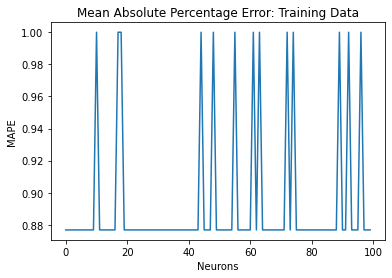

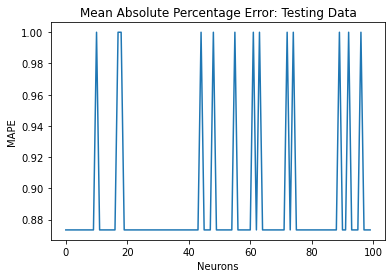

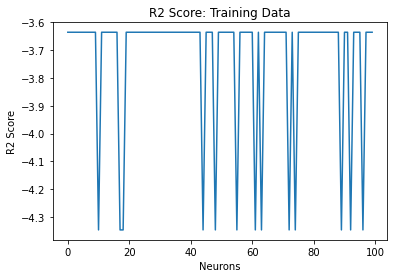

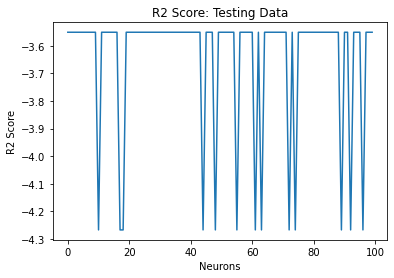

Maximum Values and Neuron Count:
	Mean Absolute Percentage Error Training Data:  1.0
	Neuron Count:  10
	Mean Absolute Percentage Error Testing Data:  1.0
	Neuron Count:  10
	R2 Score Training Data:  3.635114625304638
	Neuron Count:  0
	R2 Score Testing Data:  3.5506561242863937
	Neuron Count:  0


In [72]:
# Create 100 different models with a different neuron 
# count in the only hidden layer

# Create Models
MODEL_COUNT = 100

models = []
for i in range(MODEL_COUNT):
    models.append(RegressionModel(3, 1, [i+1]))

#training for non-linear regression
EPOCHS = 10

mape_trn = []
mape_tst = []
r2_trn = []
r2_tst = []
for i in range(len(models)):
    model = models[i]
    neuron_count = i+1
    for epoch in range(EPOCHS):
        y_pred_e = []
        for i in range(len(X_trn)):
            x = T.from_numpy(X_trn[i]).float()
            y = T.from_numpy(Y_trn[i]).float()
            
            pred_y = model(x)
            y_pred_e.append(pred_y.item())
            
            loss = model.criterion(pred_y, y)

            model.optimizer.zero_grad()
            loss.backward()
            model.optimizer.step()
            #print('epoch {}, loss {}'.format(epoch, loss.item()))
        y_pred_trn = y_pred_e

    #testing for linear regression
    y_pred_tst = []
    for x in X_tst:
        pred = model(T.from_numpy(x).float()).item()
        y_pred_tst.append(pred)
    
    print("Neurons in hidden layer: ", neuron_count)
    print("Mean Squared Error:")
    print("\tTraining:", mean_squared_error(Y_trn, y_pred_trn))
    print("\tTesting:", mean_squared_error(Y_tst, y_pred_tst))

    print("R2 Score:")
    print("\tTraining:", r2_score(Y_trn, y_pred_trn))
    r2_trn.append(r2_score(Y_trn, y_pred_trn))
    print("\tTesting:", r2_score(Y_tst, y_pred_tst))
    r2_tst.append(r2_score(Y_tst, y_pred_tst))
    
    print("Mean Absolute Percentage Error:")
    print("\tTraining:", mean_absolute_percentage_error(Y_trn, y_pred_trn))
    mape_trn.append(mean_absolute_percentage_error(Y_trn, y_pred_trn))
    print("\tTesting:", mean_absolute_percentage_error(Y_tst, y_pred_tst))
    mape_tst.append(mean_absolute_percentage_error(Y_tst, y_pred_tst))
    print("\n\n")

#Graph results from all models
fig1, ax1 = plt.subplots()
ax1.plot(mape_trn)
ax1.title.set_text("Mean Absolute Percentage Error: Training Data")
ax1.set(ylabel="MAPE", xlabel="Neurons")

fig2, ax2 = plt.subplots()
ax2.plot(mape_tst)
ax2.title.set_text("Mean Absolute Percentage Error: Testing Data")
ax2.set(ylabel="MAPE", xlabel="Neurons")

fig3, ax3 = plt.subplots()
ax3.plot(r2_trn)
ax3.title.set_text("R2 Score: Training Data")
ax3.set(ylabel="R2 Score", xlabel="Neurons")

fig4, ax4 = plt.subplots()
ax4.plot(r2_tst)
ax4.title.set_text("R2 Score: Testing Data")
ax4.set(ylabel="R2 Score", xlabel="Neurons")
plt.show()

print("Maximum Values and Neuron Count:")
print("\tMean Absolute Percentage Error Training Data: ", max(mape_trn))
print("\tNeuron Count: ", mape_trn.index(max(mape_trn)))
print("\tMean Absolute Percentage Error Testing Data: ", max(mape_tst))
print("\tNeuron Count: ", mape_tst.index(max(mape_tst)))

for i in range(len(r2_trn)):
    r2_trn[i] = abs(r2_trn[i])
print("\tR2 Score Training Data: ", min(r2_trn))
print("\tNeuron Count: ", r2_trn.index(min(r2_trn)))

for i in range(len(r2_tst)):
    r2_tst[i] = abs(r2_tst[i])
print("\tR2 Score Testing Data: ", min(r2_tst))
print("\tNeuron Count: ", r2_tst.index(min(r2_tst)))